In [48]:
import numpy as np
import pandas as pd
import folium
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
df=pd.read_csv(r"C:\Users\Mario\Documents\Labs\Module3\Project8_Uber Data Visualisation\uber-raw-data-aug14.csv")
df

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512
...,...,...,...,...
829270,8/31/2014 23:55:00,40.7552,-73.9753,B02764
829271,8/31/2014 23:55:00,40.7552,-73.9753,B02764
829272,8/31/2014 23:55:00,40.7617,-73.9788,B02764
829273,8/31/2014 23:59:00,40.7395,-73.9889,B02764


In [32]:
df.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [33]:
df.isna().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [34]:
df['Date'] = pd.to_datetime(df['Date/Time']).dt.date

In [35]:
df['Time'] = pd.to_datetime(df['Date/Time']).dt.time


In [36]:
df

,Date/Time,Lat,Lon,Base,Date,Time
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512,2014-08-01,00:03:00
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512,2014-08-01,00:09:00
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512,2014-08-01,00:12:00
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512,2014-08-01,00:12:00
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512,2014-08-01,00:12:00
...,...,...,...,...,...,...
829270,8/31/2014 23:55:00,40.7552,-73.9753,B02764,2014-08-31,23:55:00
829271,8/31/2014 23:55:00,40.7552,-73.9753,B02764,2014-08-31,23:55:00
829272,8/31/2014 23:55:00,40.7617,-73.9788,B02764,2014-08-31,23:55:00
829273,8/31/2014 23:59:00,40.7395,-73.9889,B02764,2014-08-31,23:59:00


In [37]:
df1=df[['Date','Time','Lat','Lon','Base']]

In [38]:
df1

,Date,Time,Lat,Lon,Base
0,2014-08-01,00:03:00,40.7366,-73.9906,B02512
1,2014-08-01,00:09:00,40.7260,-73.9918,B02512
2,2014-08-01,00:12:00,40.7209,-74.0507,B02512
3,2014-08-01,00:12:00,40.7387,-73.9856,B02512
4,2014-08-01,00:12:00,40.7323,-74.0077,B02512
...,...,...,...,...,...
829270,2014-08-31,23:55:00,40.7552,-73.9753,B02764
829271,2014-08-31,23:55:00,40.7552,-73.9753,B02764
829272,2014-08-31,23:55:00,40.7617,-73.9788,B02764
829273,2014-08-31,23:59:00,40.7395,-73.9889,B02764


In [39]:
# df1['Hour']=df1.Time.dt.hour
#df_group['weekday']=df_group.datetime.dt.day_name()

In [40]:
df1_sampl=df1.sample(frac=0.10, random_state=1)
df1_sampl

,Date,Time,Lat,Lon,Base
64470,2014-08-05,11:48:00,40.7036,-73.9907,B02598
304953,2014-08-05,14:34:00,40.7493,-73.9758,B02617
806937,2014-08-23,20:58:00,40.6953,-74.1775,B02764
745410,2014-08-25,01:44:00,40.7549,-73.9846,B02682
274496,2014-08-02,19:45:00,40.7650,-73.9208,B02617
...,...,...,...,...,...
12675,2014-08-12,14:47:00,40.7520,-74.0027,B02512
317723,2014-08-06,14:34:00,40.7527,-73.9794,B02617
652575,2014-08-08,04:08:00,40.7442,-73.9939,B02682
527495,2014-08-24,03:02:00,40.7419,-74.0037,B02617


In [41]:
dat_model=df1_sampl[['Lon','Lat']]

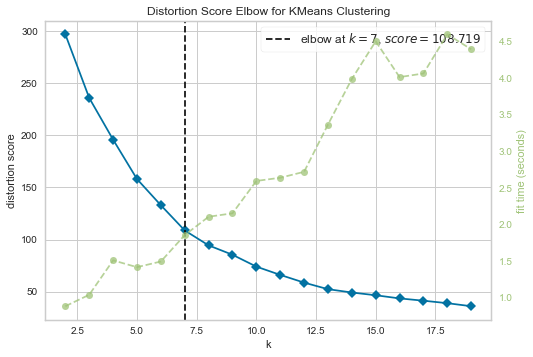

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [42]:
kmeans=KMeans()
visualizer = KElbowVisualizer(estimator = kmeans, k = (2,20))
visualizer.fit(dat_model)
visualizer.poof()

# df1.plot.scatter(x='Lat',y='Lon',c='Date')

In [43]:
kmeans=KMeans(n_clusters=7)
kmeans.fit(dat_model)
kmeans.predict(dat_model)
dat_model['KM_label']=kmeans.labels_

dat_model

C:\Users\Mario\AppData\Local\Temp\ipykernel_19272\1459678681.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat_model['KM_label']=kmeans.labels_


,Lon,Lat,KM_label
64470,-73.9907,40.7036,0
304953,-73.9758,40.7493,6
806937,-74.1775,40.6953,5
745410,-73.9846,40.7549,6
274496,-73.9208,40.7650,6
...,...,...,...
12675,-74.0027,40.7520,0
317723,-73.9794,40.7527,6
652575,-73.9939,40.7442,0
527495,-74.0037,40.7419,0


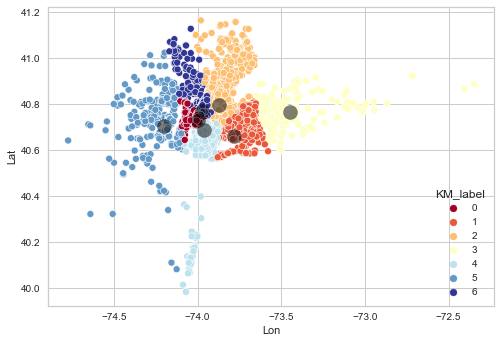

In [49]:
sns.scatterplot(data=dat_model, x='Lon', y='Lat',hue=dat_model['KM_label'], palette='RdYlBu')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [ ]:
DB=DBSCAN(min_samples=5)
DB.fit(dat_model)
dat_model['DB_label']=DB.labels_
dat_model

In [27]:
sns.scatterplot(data=dat_model, x='Lon', y='Lat',hue=dat_model['DB_label'], palette='RdYlBu')

KeyError: 'DB_label'